In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from afinn import Afinn


Cogemos la información


In [3]:
df = pd.read_csv('covid19_tweets.csv')

Visualizamos la información


In [4]:
print(df.head())
print(df.shape)
print(df.info())

         user_name         user_location   
0           ᏉᎥ☻լꂅϮ            astroworld  \
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created   
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42  \
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified   
0             624           950            18775          False  \
1            2253          1677               24           True   
2            9275          9525             7254          False   
3   

Sacamos duplicados en caso que existan

In [13]:

df = df.drop_duplicates()

Verificamos data

Creamos un histograma para ver en que localizaciones se tweeteo más

In [7]:
df = df.dropna(subset=['user_location'])

location_counts = df['user_location'].value_counts()

print(location_counts.head(10))

user_location
India               3741
United States       2455
New Delhi, India    1721
Mumbai, India       1401
Washington, DC      1354
London, England     1269
United Kingdom      1206
London              1103
New York, NY        1082
Australia            964
Name: count, dtype: int64


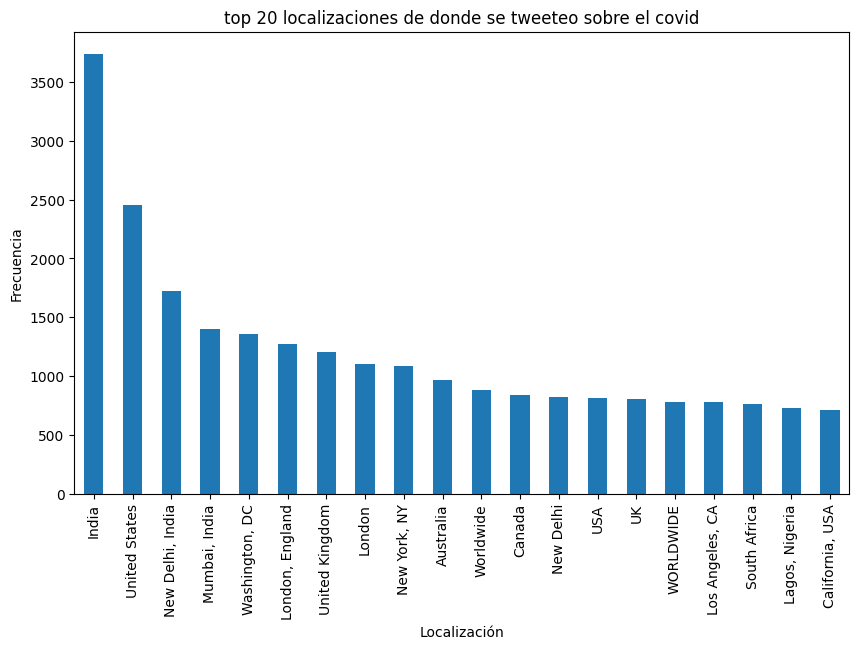

In [29]:
plt.figure(figsize=(10, 6))
location_counts.head(20).plot(kind='bar')
plt.xlabel('Localización')
plt.ylabel('Frecuencia')
plt.title('top 20 localizaciones de donde se tweeteo sobre el covid')
plt.show()


Usamos AFINN-111, un procesador de lenguaje natural que puntua las palabras por sentimientos de 5 a -5, es simple pero nos puede dar una idea de como están repartidos los tweets en terminos de sentimientos. Lo que hace basicamente es iterar por todos los 'text' de el dataset y punuar cada palabra dando un valor absoluto por cada tweet. Seria mejor usar machine learning, ya que este metodo no detectara todos los matices, sobretodo en tweets cortos y sarcasticos.

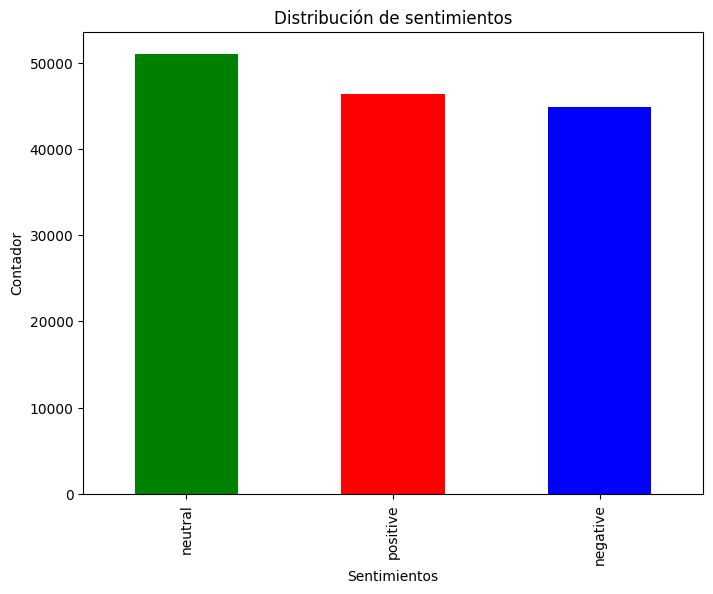

In [20]:

afinn = Afinn()


df['sentiment_score'] = df['text'].apply(afinn.score)


df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')


sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentimientos')
plt.ylabel('Contador')
plt.title('Distribución de sentimientos')
plt.show()

In [30]:

df = df.dropna(subset=['hashtags'])

all_hashtags = []

for hashtags in df['hashtags']:
    all_hashtags.extend(hashtags)

hashtag_counts = pd.Series(all_hashtags).value_counts()

print(hashtag_counts.head(100))


['covid19']       37337
'covid19']        17681
['covid19',       15295
'covid19',         9736
'coronavirus',     2239
                  ...  
['florida',          85
'quarantine',        85
'covidー19']          84
'facemask',          84
['lockdown']         84
Name: count, Length: 100, dtype: int64


In [32]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_score,sentiment
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,[['covid19']],Twitter for Android,False,-2.0,negative
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,[['covid19']],Twitter for iPhone,False,4.0,positive
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"[['coronavirusupdates',, 'covid19']]",Twitter for Android,False,2.0,positive
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"[['coronavirus',, 'covid19']]",Twitter Web App,False,-3.0,negative
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"[['covid19',, 'recruiting']]",Buffer,False,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179101,New Jersey Herald,"Newton, NJ","The New Jersey Herald, a daily newspaper in Ne...",2010-01-07 18:19:37,6274,162,38,False,2020-08-29 19:44:27,Wallkill school nurse adds COVID-19 monitoring...,"[['nurses',, 'covid19',, 'coronavirus',, 'scho...",SocialNewsDesk,False,0.0,neutral
179102,Pris,T.O.,"A/V/L Techie, camera op. but twitter has becom...",2008-12-31 16:16:12,251,160,627,False,2020-08-29 19:44:23,"we have reached 25mil cases of #covid19, world...",[['covid19']],Twitter Web App,False,1.0,positive
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,[['wearamask']],Twitter for Android,False,1.0,positive
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,[['covid19']],Twitter for Android,False,1.0,positive
